## Prediction of quality using supervised learning

### The dataset gives a set of red wine data with physicochemical (inputs) and sensory (output) variables. This dataset can be viewed as classification or regression tasks. The classes are ordered and not balanced

### In order to analyse the data, a simple classification model is built using Keras API running on top of TensorFlow.

In [2]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
data = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [4]:
data.head()

x = data.drop(columns=['quality'])
y = data['quality']
y=pd.get_dummies(pd.Series(y))

### The input features and output has been separated into x & y variables. By a validation set, the model is tuned by checking if the model is underfit, overfit or well generalised.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=0)

In [6]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1279, 11), (1279, 6), (320, 11), (320, 6))

###  A Sequential model is built, which is a linear stack of layers. This model is created by passing a list of layer instances to the constructor one at a time.

In [7]:
model = Sequential()

### A fully-connected structure with 3 layers including 2 hidden layers with 100 nodes each and 1 output layer with a single node is used. Fully connected layers are defined using the Dense class. The number of layers and number of nodes are chosen to be large enough to capture the trends/structure of the data. Since this is a binary classification, relu is used for the hidden layer and softmax is used for the output layer.

In [8]:
model.add(Dense(100,activation='relu',input_dim=11,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model.add(Dense(6,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Here 'binary_crossentropy', which is negative log-Loss is used as the loss_function. For training the model, ‘Adam’ (Adaptive Moment Estimation) optimizer has been used since Adam adopts the learning rate as the training progresses (adaptive learning rates) and converges fast.

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### The trainable parameter details of the model are given below. The first layer has 1200 parameters and the second layer has 10100 parameters. The total number of trainable parameters is 11906.

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 606       
Total params: 11,906
Trainable params: 11,906
Non-trainable params: 0
_________________________________________________________________


### Fit method is used to train the model with the training set (x_train,y_train). Verbose is set to 1 to turn off the log output from each epoch. The number of epochs is set to 10. Batch size is set depending on the amount of data, and it determines the number of training examples utilized in one iteration.

In [21]:
model_output = model.fit(x_train,y_train,epochs=10,batch_size=20,verbose=1,validation_data=(x_test,y_test),)

Train on 1279 samples, validate on 320 samples
Epoch 1/10
1279/1279 [==============================] - 1s 548us/step - loss: 0.3664 - acc: 0.8436 - val_loss: 0.3442 - val_acc: 0.8437
Epoch 2/10
1279/1279 [==============================] - 0s 128us/step - loss: 0.3536 - acc: 0.8445 - val_loss: 0.3368 - val_acc: 0.8401
Epoch 3/10
1279/1279 [==============================] - 0s 120us/step - loss: 0.3462 - acc: 0.8436 - val_loss: 0.3333 - val_acc: 0.8427
Epoch 4/10
1279/1279 [==============================] - 0s 120us/step - loss: 0.3417 - acc: 0.8451 - val_loss: 0.3204 - val_acc: 0.8479
Epoch 5/10
1279/1279 [==============================] - 0s 117us/step - loss: 0.3362 - acc: 0.8445 - val_loss: 0.3188 - val_acc: 0.8474
Epoch 6/10
1279/1279 [==============================] - 0s 118us/step - loss: 0.3365 - acc: 0.8462 - val_loss: 0.3185 - val_acc: 0.8437
Epoch 7/10
1279/1279 [==============================] - 0s 116us/step - loss: 0.3345 - acc: 0.8445 - val_loss: 0.3146 - val_acc: 0.8422
E

### The model training and validation accuracy are shown below. The training accuracy from the last epoch is around 84.44 and validation accuracy is 84.43. Average training accuracy over all the epochs is around 84.48% and average validation accuracy is 84.46%.

In [22]:
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

Training Accuracy :  0.8448527350474186
Validation Accuracy :  0.8446354109793901


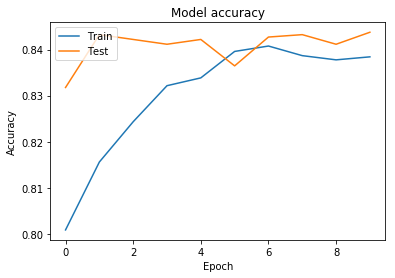

In [13]:
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

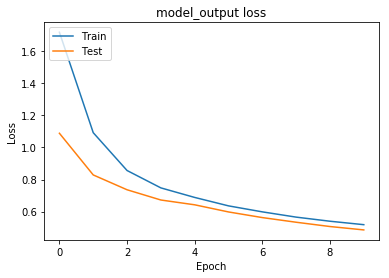

In [14]:
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()